### Подключение к базе и основные таблицы

In [1]:
import pandas as pd

### Данные по пользователям

# user_info = pd.read_sql(
#     """SELECT * FROM public.user_data""",
    
#     con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
#         "postgres.lab.karpov.courses:6432/startml"
# )

user_info = pd.read_csv('user_info.csv',index_col=0)

user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [2]:
### Посты и топики

posts_info = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

# posts_info = pd.read_csv('posts_info.csv',index_col=0)
posts_info.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [3]:
### Почти 77 миллионов записей, многовато!
### Не в каждую оперативу влезет столько данных
### Для обучения моделей

count_feed_data = pd.read_sql(
    """SELECT count(*) FROM public.feed_data""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

count_feed_data.head()

,count
0,76892800


In [4]:
### Попробуем забрать, скажем, 10 миллионов

# feed_data = pd.read_sql(
#     """SELECT * FROM public.feed_data LIMIT 1000000""",
    
#     con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
#         "postgres.lab.karpov.courses:6432/startml"
# )

feed_data = pd.read_csv('feed_data.csv', index_col=0)

feed_data.shape

(1000000, 5)

### Работа с данными и фичи для контентной модели

In [5]:
### Как устроена колонка target?

feed_data[feed_data.action!='view']

,timestamp,user_id,post_id,action,target
2,2021-12-03 09:43:12,122995,4440,like,0
12,2021-10-30 21:13:07,163289,5955,like,0
27,2021-10-30 21:31:39,163289,6826,like,0
32,2021-10-30 21:40:20,163289,7246,like,0
44,2021-11-03 18:20:22,163289,6935,like,0
...,...,...,...,...,...
999935,2021-11-15 11:27:53,109398,515,like,0
999937,2021-11-15 11:29:40,109398,6392,like,0
999950,2021-11-15 11:50:47,109398,6151,like,0
999969,2021-11-22 22:19:54,109398,618,like,0


In [6]:
### Почистим данные от action != view

feed_data = feed_data[feed_data.action=='view']

feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-12-03 09:40:03,122995,4723,view,0
1,2021-12-03 09:41:48,122995,4440,view,1
3,2021-12-11 13:23:09,122995,3062,view,0
4,2021-12-11 13:25:16,122995,5879,view,0
5,2021-12-11 13:27:16,122995,1604,view,0


Напомним, как устроен контентный подход! 

Научимся по выбранной дате timestamp 

И для любой пары (user_id, post_id)

Предсказывать, случится лайк или нет

Хорошо бы иметь модель, которая умеет предсказывать вероятности

In [7]:
### Необходимо по user_id выделять 
### Фиксированный набор признаков
### В целом, подойдет оригинальный датасет

user_info

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [8]:
### C post_id куда интереснее!
### Придумаем какой-нибудь эмбеддинг 
### Для текстов

posts_info

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


## TF-IDF

In [9]:
# import re
# import string

# from nltk.stem import WordNetLemmatizer 
# from sklearn.feature_extraction.text import TfidfVectorizer

# wnl = WordNetLemmatizer()

# def preprocessing(line, token=wnl):
#     line = line.lower()
#     line = re.sub(r"[{}]".format(string.punctuation), " ", line)
#     line = line.replace('\n\n', ' ').replace('\n', ' ')
#     line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
#     return line


# tfidf = TfidfVectorizer(
#     stop_words='english',
#     preprocessor=preprocessing
# )

In [10]:
# tfidf_data = (
#     tfidf
#     .fit_transform(posts_info['text'])
#     .toarray()
# )

# tfidf_data

In [11]:
# tfidf_data = pd.DataFrame(
#     tfidf_data,
#     index=posts_info.post_id,
#     columns=tfidf.get_feature_names_out()
# )

# tfidf_data

In [12]:
### Генерим фичи на основе TfIdf

# posts_info['TotalTfIdf'] = tfidf_data.sum(axis=1).reset_index()[0]
# posts_info['MaxTfIdf'] = tfidf_data.max(axis=1).reset_index()[0]
# posts_info['MeanTfIdf'] = tfidf_data.mean(axis=1).reset_index()[0]

# posts_info.head()

In [13]:
### Пытаемся кластеризовать тексты

# from sklearn.decomposition import PCA

# centered = tfidf_data - tfidf_data.mean()

# pca = PCA(n_components=20)
# pca_decomp = pca.fit_transform(centered)

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=15, random_state=0).fit(pca_decomp)

# posts_info['TextCluster'] = kmeans.labels_

# dists_columns = ['DistanceTo1thCluster',
#                  'DistanceTo2thCluster',
#                  'DistanceTo3thCluster',
#                  'DistanceTo4thCluster',
#                  'DistanceTo5thCluster',
#                  'DistanceTo6thCluster',
#                  'DistanceTo7thCluster',
#                  'DistanceTo8thCluster',
#                  'DistanceTo9thCluster',
#                  'DistanceTo10thCluster',
#                  'DistanceTo11thCluster',
#                  'DistanceTo12thCluster',
#                  'DistanceTo13thCluster',
#                  'DistanceTo14thCluster',
#                  'DistanceTo15thCluster']

# dists_df = pd.DataFrame(
#     data=kmeans.transform(pca_decomp),
#     columns=dists_columns
# )

# dists_df.head()

## Tranformer Imlpementation

In [14]:
import re
import string

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

wnl = WordNetLemmatizer()

def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = re.sub(' +', ' ', line)
    line = line.replace('\n\n', ' ').replace('\n', ' ')
    line = ' '.join([token.lemmatize(x) for x in line.split(' ')])
    return line

processed_text = [preprocessing(line, token=wnl).strip() for line in posts_info['text']]

In [15]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

embedding = embedder.encode(processed_text)

In [16]:
embedding.shape

(7023, 768)

In [17]:
dists_df = pd.DataFrame(embedding).add_prefix('emb_')

In [18]:
### Пытаемся кластеризовать тексты

# from sklearn.decomposition import PCA

# centered = embeddings - embeddings.mean()

# pca = PCA(n_components=20)
# pca_decomp = pca.fit_transform(centered)

# from sklearn.cluster import KMeans

# n_clusters = 20
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pca_decomp)

# posts_info['TextCluster'] = kmeans.labels_

# dists_columns = [f'DistanceTo{i+1}thCluster' for i in range(n_clusters)]

# dists_df = pd.DataFrame(
#     data=kmeans.transform(pca_decomp),
#     columns=dists_columns
# )

# dists_df.head()

In [19]:
posts_info = pd.concat((posts_info, dists_df), axis=1)

posts_info.head()

,post_id,text,topic,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,1,UK economy facing major risks\n\nThe UK manufa...,business,-0.018031,0.269491,0.219898,-1.092938,0.500940,0.922379,-0.879770,...,0.004425,0.270500,0.600288,-0.086290,0.350694,0.223578,0.119399,0.241452,0.161123,0.042031
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,0.520589,0.011017,0.790112,-0.525378,-0.121837,-0.372391,-0.003382,...,0.085221,0.089297,-0.424501,0.297934,0.061592,0.355775,0.410872,-0.035457,-0.125563,-0.446159
2,3,Asian quake hits European shares\n\nShares in ...,business,-0.049535,0.083031,0.603357,-0.635846,-0.030420,0.320853,-0.499204,...,0.086098,0.125400,0.257859,0.811711,0.255823,0.703632,0.050012,-0.214574,0.507653,-0.188382
3,4,India power shares jump on debut\n\nShares in ...,business,0.262463,0.051304,-0.068738,-0.051576,0.044899,-0.151175,-0.641888,...,-0.021699,0.647895,0.455733,0.779949,-0.093319,0.558973,-0.232524,0.706694,0.570433,-0.601649
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,-0.111720,0.333528,0.064618,-0.289535,0.063222,0.401493,-0.157527,...,-0.429187,-0.137318,0.520505,0.270844,0.370177,0.376982,0.420318,-0.549834,0.290074,-0.145081


In [20]:
### Воспроизведем датафрейм со всеми новыми фичами 

df = pd.merge(feed_data,
              posts_info,
              on='post_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,emb_0,emb_1,emb_2,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,2021-12-03 09:40:03,122995,4723,view,0,The TV ads for this movie showed the warlocks ...,movie,0.384140,-0.209238,0.361545,...,-0.932033,0.734044,0.131111,1.405302,-0.326565,0.435004,0.230288,0.066196,0.802440,-0.579241
1,2021-12-03 09:41:48,122995,4440,view,1,"I was supposed to review this for a website, a...",movie,0.471142,0.179895,0.775594,...,-0.248582,0.298020,-0.088999,0.962393,0.342852,0.144899,0.018346,0.259488,0.611155,0.369193
2,2021-12-11 13:23:09,122995,3062,view,0,@CityBrampton @regionofpeel theres got to be a...,covid,0.245657,0.394446,0.902571,...,-0.569726,-0.876327,0.175542,0.626530,0.222775,-0.266700,0.258809,0.098034,-0.192771,0.915606
3,2021-12-11 13:25:16,122995,5879,view,0,This movie and several other movies from the 1...,movie,0.747210,0.084539,0.132290,...,-0.783297,-0.226114,-0.480524,0.276827,0.294320,0.085009,0.526668,-0.138147,0.499389,-0.562471
4,2021-12-11 13:27:16,122995,1604,view,0,Prutton poised for lengthy FA ban\n\nSouthampt...,sport,-0.233423,0.078610,0.656478,...,0.365824,0.756298,0.393738,0.749302,0.314617,-0.238068,-0.429926,0.603919,0.572806,0.590800


In [21]:
df = pd.merge(df,
              user_info,
              on='user_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,emb_0,emb_1,emb_2,...,emb_765,emb_766,emb_767,gender,age,country,city,exp_group,os,source
0,2021-12-03 09:40:03,122995,4723,view,0,The TV ads for this movie showed the warlocks ...,movie,0.384140,-0.209238,0.361545,...,0.066196,0.802440,-0.579241,1,18,Kazakhstan,Pavlodar,4,Android,organic
1,2021-12-03 09:41:48,122995,4440,view,1,"I was supposed to review this for a website, a...",movie,0.471142,0.179895,0.775594,...,0.259488,0.611155,0.369193,1,18,Kazakhstan,Pavlodar,4,Android,organic
2,2021-12-11 13:23:09,122995,3062,view,0,@CityBrampton @regionofpeel theres got to be a...,covid,0.245657,0.394446,0.902571,...,0.098034,-0.192771,0.915606,1,18,Kazakhstan,Pavlodar,4,Android,organic
3,2021-12-11 13:25:16,122995,5879,view,0,This movie and several other movies from the 1...,movie,0.747210,0.084539,0.132290,...,-0.138147,0.499389,-0.562471,1,18,Kazakhstan,Pavlodar,4,Android,organic
4,2021-12-11 13:27:16,122995,1604,view,0,Prutton poised for lengthy FA ban\n\nSouthampt...,sport,-0.233423,0.078610,0.656478,...,0.603919,0.572806,0.590800,1,18,Kazakhstan,Pavlodar,4,Android,organic


In [22]:
### А еще научимся выделять признаки
### Из timestamp!
### Согласитесь, от времени просмотра может зависеть
### Склонность пользователей лайкать или игнорировать посты

df['hour'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.hour)
df['month'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.month)

df.head()

,timestamp,user_id,post_id,action,target,text,topic,emb_0,emb_1,emb_2,...,emb_767,gender,age,country,city,exp_group,os,source,hour,month
0,2021-12-03 09:40:03,122995,4723,view,0,The TV ads for this movie showed the warlocks ...,movie,0.384140,-0.209238,0.361545,...,-0.579241,1,18,Kazakhstan,Pavlodar,4,Android,organic,9,12
1,2021-12-03 09:41:48,122995,4440,view,1,"I was supposed to review this for a website, a...",movie,0.471142,0.179895,0.775594,...,0.369193,1,18,Kazakhstan,Pavlodar,4,Android,organic,9,12
2,2021-12-11 13:23:09,122995,3062,view,0,@CityBrampton @regionofpeel theres got to be a...,covid,0.245657,0.394446,0.902571,...,0.915606,1,18,Kazakhstan,Pavlodar,4,Android,organic,13,12
3,2021-12-11 13:25:16,122995,5879,view,0,This movie and several other movies from the 1...,movie,0.747210,0.084539,0.132290,...,-0.562471,1,18,Kazakhstan,Pavlodar,4,Android,organic,13,12
4,2021-12-11 13:27:16,122995,1604,view,0,Prutton poised for lengthy FA ban\n\nSouthampt...,sport,-0.233423,0.078610,0.656478,...,0.590800,1,18,Kazakhstan,Pavlodar,4,Android,organic,13,12


In [23]:
### Уберем все ненужные колонки

df = df.drop([
#    'timestamp',  ### timestamp пока оставим
    'action',
    'text',
],
    axis=1)

df = df.set_index(['user_id', 'post_id'])

df.head(5)

timestamp  target  topic     emb_0     emb_1  \
user_id post_id                                                           
122995  4723     2021-12-03 09:40:03       0  movie  0.384140 -0.209238   
        4440     2021-12-03 09:41:48       1  movie  0.471142  0.179895   
        3062     2021-12-11 13:23:09       0  covid  0.245657  0.394446   
        5879     2021-12-11 13:25:16       0  movie  0.747210  0.084539   
        1604     2021-12-11 13:27:16       0  sport -0.233423  0.078610   

                    emb_2     emb_3     emb_4     emb_5     emb_6  ...  \
user_id post_id                                                    ...   
122995  4723     0.361545 -0.120431 -0.343280  0.118967  0.086640  ...   
        4440     0.775594 -0.398117 -0.544513  0.615074 -0.225676  ...   
        3062     0.902571 -0.708208  0.076150 -0.188918  0.038818  ...   
        5879     0.132290  0.390271 -0.179788 -0.040259  0.452155  ...   
        1604     0.656478 -1.054650 -0.126590  0.114959 -0.391555  ...   

                  emb_767  gender  age     country      city  exp_group  \
user_id post_id                                                           
122995  4723    -0.579241       1   18  Kazakhstan  Pavlodar          4   
        4440     0.369193       1   18  Kazakhstan  Pavlodar          4   
        3062     0.915606       1   18  Kazakhstan  Pavlodar          4   
        5879    -0.562471       1   18  Kazakhstan  Pavlodar          4   
        1604     0.590800       1   18  Kazakhstan  Pavlodar          4   

                      os   source  hour  month  
user_id post_id                                 
122995  4723     Android  organic     9     12  
        4440     Android  organic     9     12  
        3062     Android  organic    13     12  
        5879     Android  organic    13     12  
        1604     Android  organic    13     12  

[5 rows x 780 columns]

In [24]:
df.columns

Index(['timestamp', 'target', 'topic', 'emb_0', 'emb_1', 'emb_2', 'emb_3',
       'emb_4', 'emb_5', 'emb_6',
       ...
       'emb_767', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source', 'hour', 'month'],
      dtype='object', length=780)

### Пора обучать модели! 

In [25]:
### Предлагаю начать с относительно простой модели
### Например, с решающего дерева
### А потом посмотреть уже в сторону бустингов

### Как валидировать? Как разобьем на train и test?
### Предлагаю по времени, так как данные имеют 
### Временную структуру! Хотим корректно оценивать
### Вероятности для будущих рекомендаций

max(df.timestamp), min(df.timestamp)

('2021-12-29 23:43:15', '2021-10-01 06:01:40')

In [26]:
### За отсечку возьмем 2021-12-15

df_train = df[df.timestamp < '2021-12-15']
df_test = df[df.timestamp >= '2021-12-15']

df_train = df_train.drop('timestamp', axis=1)
df_test = df_test.drop('timestamp', axis=1)

X_train = df_train.drop('target', axis=1)
X_test = df_test.drop('target', axis=1)

y_train = df_train['target']
y_test = df_test['target']

y_train.shape, y_test.shape

((745619,), (149104,))

In [27]:
X_train

topic     emb_0     emb_1     emb_2     emb_3     emb_4  \
user_id post_id                                                               
122995  4723        movie  0.384140 -0.209238  0.361545 -0.120431 -0.343280   
        4440        movie  0.471142  0.179895  0.775594 -0.398117 -0.544513   
        3062        covid  0.245657  0.394446  0.902571 -0.708208  0.076150   
        5879        movie  0.747210  0.084539  0.132290  0.390271 -0.179788   
        1604        sport -0.233423  0.078610  0.656478 -1.054650 -0.126590   
...                   ...       ...       ...       ...       ...       ...   
109398  1269     politics -0.061116  0.429979  0.276092 -1.031195 -0.114211   
        5534        movie  0.871287 -0.121879  0.611724  0.629446 -0.456187   
        480      business  0.083551  0.320589  0.062087  0.229743  0.087180   
        1336     politics  0.099731  0.268070  0.046258 -0.386409 -0.223224   
        6595        movie  0.456176 -0.346234  0.407832  0.104643 -0.332984   

                    emb_5     emb_6     emb_7     emb_8  ...   emb_767  \
user_id post_id                                          ...             
122995  4723     0.118967  0.086640 -0.751832  0.252797  ... -0.579241   
        4440     0.615074 -0.225676 -0.630725  0.501987  ...  0.369193   
        3062    -0.188918  0.038818  0.179720 -0.016730  ...  0.915606   
        5879    -0.040259  0.452155 -0.437505  0.477168  ... -0.562471   
        1604     0.114959 -0.391555 -0.805128  0.142260  ...  0.590800   
...                   ...       ...       ...       ...  ...       ...   
109398  1269     0.013795 -0.381927 -0.678216  0.537155  ... -0.041302   
        5534     0.534010 -0.107179 -0.377779  0.750037  ...  0.243573   
        480      0.135401  0.082915 -0.554395  0.581217  ...  0.220032   
        1336     0.483481 -0.074436 -0.276860 -0.089420  ...  0.389828   
        6595     0.393162  0.039812 -0.623834  0.890292  ...  0.133532   

                 gender  age     country      city  exp_group       os  \
user_id post_id                                                          
122995  4723          1   18  Kazakhstan  Pavlodar          4  Android   
        4440          1   18  Kazakhstan  Pavlodar          4  Android   
        3062          1   18  Kazakhstan  Pavlodar          4  Android   
        5879          1   18  Kazakhstan  Pavlodar          4  Android   
        1604          1   18  Kazakhstan  Pavlodar          4  Android   
...                 ...  ...         ...       ...        ...      ...   
109398  1269          0   40      Russia  Kemerovo          0  Android   
        5534          0   40      Russia  Kemerovo          0  Android   
        480           0   40      Russia  Kemerovo          0  Android   
        1336          0   40      Russia  Kemerovo          0  Android   
        6595          0   40      Russia  Kemerovo          0  Android   

                  source  hour  month  
user_id post_id                        
122995  4723     organic     9     12  
        4440     organic     9     12  
        3062     organic    13     12  
        5879     organic    13     12  
        1604     organic    13     12  
...                  ...   ...    ...  
109398  1269     organic    22     11  
        5534     organic    23     11  
        480      organic    23     11  
        1336     organic    23     11  
        6595     organic    23     11  

[745619 rows x 778 columns]

In [29]:
### Начнем с решающего дерева!

# from sklearn.compose import ColumnTransformer
# from category_encoders import TargetEncoder
# from category_encoders.one_hot import OneHotEncoder

# object_cols = [
#     'topic', 'TextCluster', 'gender', 'country',
#     'city', 'exp_group', 'hour', 'month',
#     'os', 'source'
# ]

object_cols = [
    'topic',  'gender', 'country',
    'city', 'exp_group', 'hour', 'month',
    'os', 'source'
]

cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]

# ### Cохраним индексы этих колонок

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

# t = [
#     ('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
#     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx)
# ]

# col_transform = ColumnTransformer(transformers=t)

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline

# pipe_dt = Pipeline([("column_transformer",
#                      col_transform),
                     
#                     ("decision_tree", 
#                      DecisionTreeClassifier())])

# pipe_dt.fit(X_train, y_train)

In [30]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

from sklearn.metrics import roc_auc_score

# print(f"Качество на трейне: {roc_auc_score(y_train, pipe_dt.predict_proba(X_train)[:, 1])}")
# print(f"Качество на тесте: {roc_auc_score(y_test, pipe_dt.predict_proba(X_test)[:, 1])}")

In [31]:
X_train.columns

Index(['topic', 'emb_0', 'emb_1', 'emb_2', 'emb_3', 'emb_4', 'emb_5', 'emb_6',
       'emb_7', 'emb_8',
       ...
       'emb_767', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source', 'hour', 'month'],
      dtype='object', length=778)

In [46]:
### Теперь обучим катбуст!

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100,
                              learning_rate=.2,
                              depth=4)

catboost.fit(X_train, y_train, object_cols)

0:	learn: 0.5559538	total: 1.22s	remaining: 2m 1s
1:	learn: 0.4751784	total: 2.6s	remaining: 2m 7s
2:	learn: 0.4275724	total: 3.52s	remaining: 1m 53s
3:	learn: 0.3979375	total: 4.59s	remaining: 1m 50s
4:	learn: 0.3802985	total: 5.72s	remaining: 1m 48s
5:	learn: 0.3688840	total: 6.74s	remaining: 1m 45s
6:	learn: 0.3622936	total: 7.74s	remaining: 1m 42s
7:	learn: 0.3579861	total: 8.74s	remaining: 1m 40s
8:	learn: 0.3550905	total: 9.69s	remaining: 1m 37s
9:	learn: 0.3530887	total: 10.6s	remaining: 1m 35s
10:	learn: 0.3498255	total: 11.8s	remaining: 1m 35s
11:	learn: 0.3479115	total: 12.8s	remaining: 1m 33s
12:	learn: 0.3466733	total: 13.7s	remaining: 1m 31s
13:	learn: 0.3459303	total: 14.8s	remaining: 1m 30s
14:	learn: 0.3453178	total: 16s	remaining: 1m 30s
15:	learn: 0.3450004	total: 17s	remaining: 1m 29s
16:	learn: 0.3447229	total: 18s	remaining: 1m 27s
17:	learn: 0.3445245	total: 19.3s	remaining: 1m 27s
18:	learn: 0.3443771	total: 20s	remaining: 1m 25s
19:	learn: 0.3442455	total: 21s	r

In [47]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.6792857633197146
Качество на тесте: 0.6520885994614889


In [ ]:
# Качество на трейне: 0.7189311451611123
# Качество на тесте: 0.6587575022908112

In [48]:
X_train.columns

Index(['topic', 'emb_0', 'emb_1', 'emb_2', 'emb_3', 'emb_4', 'emb_5', 'emb_6',
       'emb_7', 'emb_8',
       ...
       'emb_767', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source', 'hour', 'month'],
      dtype='object', length=778)

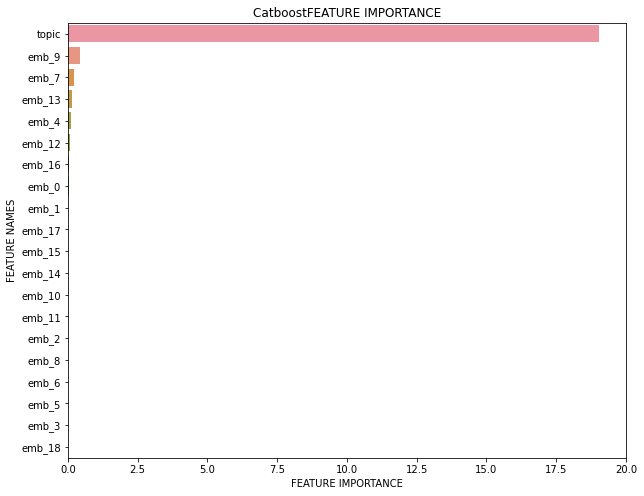

In [49]:
### Из любопытства посмотрим на feature_importance

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)[:20]
    feature_names = np.array(names)[:20]
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_, X_train.columns,'Catboost')

In [52]:
### Сохраним модель

catboost.save_model(
    'catboost_model',
    format="cbm"
)

### Положим в базу фичи, необходимые для функционала нашей модели

In [51]:
posts_info.to_sql(    
   "posts_info_features",                    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml",                      
    schema="public",                   
    if_exists='replace'            
   )                               
                                   

KeyboardInterrupt: 

In [ ]:
### Все ли норм?

test_ = pd.read_sql(
    """SELECT * FROM public.posts_info_features""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

test_

,index,post_id,text,topic,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,0,1,UK economy facing major risks\n\nThe UK manufa...,business,-0.018031,0.269491,0.219898,-1.092938,0.500940,0.922379,...,0.004425,0.270500,0.600288,-0.086290,0.350694,0.223578,0.119399,0.241452,0.161123,0.042031
1,1,2,Aids and climate top Davos agenda\n\nClimate c...,business,0.520589,0.011017,0.790112,-0.525378,-0.121837,-0.372391,...,0.085221,0.089297,-0.424501,0.297934,0.061592,0.355775,0.410872,-0.035457,-0.125563,-0.446159
2,2,3,Asian quake hits European shares\n\nShares in ...,business,-0.049535,0.083031,0.603357,-0.635846,-0.030420,0.320853,...,0.086098,0.125400,0.257859,0.811711,0.255823,0.703632,0.050012,-0.214574,0.507653,-0.188382
3,3,4,India power shares jump on debut\n\nShares in ...,business,0.262463,0.051304,-0.068738,-0.051576,0.044899,-0.151175,...,-0.021699,0.647895,0.455733,0.779949,-0.093319,0.558973,-0.232524,0.706694,0.570433,-0.601649
4,4,5,Lacroix label bought by US firm\n\nLuxury good...,business,-0.111720,0.333528,0.064618,-0.289535,0.063222,0.401493,...,-0.429187,-0.137318,0.520505,0.270844,0.370177,0.376982,0.420318,-0.549834,0.290074,-0.145081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,0.299772,-0.181302,0.632361,0.173592,-0.494757,0.473049,...,-0.152747,-0.305511,-0.302793,0.189620,0.173232,0.854406,0.130235,0.479356,0.399148,0.057507
7019,7019,7316,I give this movie 2 stars purely because of it...,movie,0.350941,0.033194,-0.136315,0.195469,-0.121552,0.226735,...,-0.265474,-0.103890,0.073278,0.819087,0.552055,0.867476,0.326748,0.678133,-0.106737,0.205219
7020,7020,7317,I cant believe this film was allowed to be mad...,movie,0.308175,0.218244,0.294916,0.302573,-0.518162,0.260244,...,-0.583731,-0.551617,0.035042,0.119094,0.367551,0.205191,0.334054,0.098771,0.355033,0.092064
7021,7021,7318,The version I saw of this film was the Blockbu...,movie,0.513628,0.135025,0.253664,-0.078443,0.265887,0.573322,...,-0.271356,-0.464357,0.144858,1.141067,0.056324,0.958953,0.307468,0.324644,0.445654,-0.189162
